<a href="https://colab.research.google.com/github/giulliabraga/pcos-stats/blob/main/2_EDA_original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto da Disciplina de Princípios e Técnicas da Análise Estatística Experimental

In [1]:
!pip install -U datasets transformers umap-learn ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('/content/dataset2-pcos-2023.csv')

# Renomear as colunas
columns = ['Idade (em anos)', 'Peso (em Kg)', 'Altura (em cm/pés)', 'Você pode nos dizer seu grupo sanguíneo?', 'Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente)', ' Você ganhou peso recentemente?', 'Você tem crescimento excessivo de pêlos no corpo/facial?', 'Você está notando escurecimento da pele recentemente?', 'Tem queda de cabelo/afinamento/calvície?', 'Você tem espinhas/acne no rosto/queixo?', 'Você come fast food regularmente?', 'Você se exercita regularmente?', 'Você foi diagnosticado com SOP/PCOD?', 'Você experimenta mudanças de humor?', 'Suas menstruações são regulares?', 'Quanto tempo dura sua menstruação? (em dias)']
df.columns = columns

In [5]:
df.head()

,Idade (em anos),Peso (em Kg),Altura (em cm/pés),Você pode nos dizer seu grupo sanguíneo?,Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente),Você ganhou peso recentemente?,Você tem crescimento excessivo de pêlos no corpo/facial?,Você está notando escurecimento da pele recentemente?,Tem queda de cabelo/afinamento/calvície?,Você tem espinhas/acne no rosto/queixo?,Você come fast food regularmente?,Você se exercita regularmente?,Você foi diagnosticado com SOP/PCOD?,Você experimenta mudanças de humor?,Suas menstruações são regulares?,Quanto tempo dura sua menstruação? (em dias)
0,21,47.0,168.0,13,1,0,0,0,0,0,0,0,0,1,1,6
1,21,45.0,156.0,11,1,0,0,1,1,1,0,0,0,1,1,4
2,17,37.0,162.0,15,1,0,0,0,0,1,1,0,0,1,1,6
3,28,54.0,160.0,15,1,0,0,0,0,0,0,0,0,1,1,4
4,45,40.0,150.0,13,2,0,0,0,1,0,0,0,1,1,0,7


## **Análise Exploratória dos dados**


## **1°Compreensão dos Tipos de Dados:**

> **Identificar e entender os diferentes tipos de dados presentes no conjunto de dados:**

**Dicionario de Dados:**

| Variável  |   Tipo   |     
|-----------|----------|
| Idade (em anos)     | int64   |
| Peso (em Kg)        | float64  |
| Altura (em cm/pés)  | float64   |
| Você pode nos dizer seu grupo sanguíneo?  | int64 |
| Depois de quantos meses você começa a menstruar?   | int64   
| Você ganhou peso  recentemente?  | int64  
| Você tem crescimento excessivo de pêlos no corpo/facial?        | int64
| Você está notando escurecimento da pele recentemente?      | int64
| Tem queda de cabelo/afinamento/calvície? | int64   
|    Você tem espinhas/acne no rosto/queixo?     | int64
| Você come fast food regularmente?                      | int64   |
| Você se exercita regularmente?       | int64   |
|  Você foi diagnosticado com SOP/PCOD?                        | int64   |
| Você experimenta mudanças de humor?            | int64   |
| Suas menstruações são regulares?             | int64   |
| Quanto tempo dura sua menstruação? (em dias)            | int64   |

**Resumo da Estrutura do DataFrame:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Idade (em anos)                                                                              465 non-null    int64  
 1   Peso (em Kg)                                                                                 465 non-null    float64
 2   Altura (em cm/pés)                                                                           465 non-null    float64
 3   Você pode nos dizer seu grupo sanguíneo?                                                     465 non-null    int64  
 4   Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente)  465 non-null    int64  
 5    Você ganhou peso recentemente?     

**Análise de Tipos de Dados e Variáveis Categóricas/Numéricas:**

In [7]:
print("\nTipos de dados das colunas:")
print(len(df.dtypes))

# Selecionando as colunas do tipo object (categóricas)
print('Variáveis categóricas:', df.select_dtypes(include=['object']).columns)

# Selecionando as colunas do tipo number (numéricas)
print('Variáveis Numéricas:', df.select_dtypes(exclude=['object']).columns)


Tipos de dados das colunas:
16
Variáveis categóricas: Index([], dtype='object')
Variáveis Numéricas: Index(['Idade (em anos)', 'Peso (em Kg)', 'Altura (em cm/pés)',
       'Você pode nos dizer seu grupo sanguíneo?',
       'Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente)',
       ' Você ganhou peso recentemente?',
       'Você tem crescimento excessivo de pêlos no corpo/facial?',
       'Você está notando escurecimento da pele recentemente?',
       'Tem queda de cabelo/afinamento/calvície?',
       'Você tem espinhas/acne no rosto/queixo?',
       'Você come fast food regularmente?', 'Você se exercita regularmente?',
       'Você foi diagnosticado com SOP/PCOD?',
       'Você experimenta mudanças de humor?',
       'Suas menstruações são regulares?',
       'Quanto tempo dura sua menstruação? (em dias)'],
      dtype='object')


## **2° Estatísticas Resumidas**


> **Calcular e analisar estatísticas resumidas para as colunas numéricas do conjunto de dados**

In [8]:
df.describe()

,Idade (em anos),Peso (em Kg),Altura (em cm/pés),Você pode nos dizer seu grupo sanguíneo?,Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente),Você ganhou peso recentemente?,Você tem crescimento excessivo de pêlos no corpo/facial?,Você está notando escurecimento da pele recentemente?,Tem queda de cabelo/afinamento/calvície?,Você tem espinhas/acne no rosto/queixo?,Você come fast food regularmente?,Você se exercita regularmente?,Você foi diagnosticado com SOP/PCOD?,Você experimenta mudanças de humor?,Suas menstruações são regulares?,Quanto tempo dura sua menstruação? (em dias)
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,25.455914,59.286667,157.916473,13.262366,1.221505,0.501075,0.264516,0.337634,0.619355,0.412903,0.359140,0.286022,0.219355,0.761290,0.784946,4.600000
std,8.099775,11.137046,14.933218,1.499994,0.541758,0.500537,0.441550,0.473412,0.486068,0.492886,0.480265,0.452386,0.414255,0.426754,0.411302,1.536622
min,13.000000,33.000000,4.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,51.000000,154.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
50%,22.000000,58.000000,160.000000,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000
75%,28.000000,65.000000,164.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000
max,58.000000,100.000000,186.000000,16.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


## **3° Tratamento de Valores Ausentes**

>  **Identificar e tratar valores ausentes no conjunto de dados, utilizando estratégias de imputação ou exclusão**

In [9]:
df.isna().sum()

,0
Idade (em anos),0
Peso (em Kg),0
Altura (em cm/pés),0
Você pode nos dizer seu grupo sanguíneo?,0
Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente),0
Você ganhou peso recentemente?,0
Você tem crescimento excessivo de pêlos no corpo/facial?,0
Você está notando escurecimento da pele recentemente?,0
Tem queda de cabelo/afinamento/calvície?,0
Você tem espinhas/acne no rosto/queixo?,0


**Obs: Não foi encontrado dados ausentes na base de dados**

## **4° Visualização de Dados:**

> Visualizar as distribuições de características numéricas no conjunto de dados, usando histogramas e box plots.  Através dessas visualizações, identificar padrões e outliers nos dados. Bônus: aplicar técnicas avançadas de projeção dos dados como tSNE e UMAP.



### **Visualização com Histogramas**


<ipython-input-10-ec672ae5b81a>:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.histplot(data=df,x=feature, hue='Você foi diagnosticado com SOP/PCOD?', ax=ax, multiple="stack", legend=True, palette=sns.color_palette("Paired")[0:7])
<ipython-input-10-ec672ae5b81a>:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.histplot(data=df,x=feature, hue='Você foi diagnosticado com SOP/PCOD?', ax=ax, multiple="stack", legend=True, palette=sns.color_palette("Paired")[0:7])
<ipython-input-10-ec672ae5b81a>:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.histplot(data=df,x=feature, hue='Você foi diagnosticado com SOP/PCOD?', ax=ax, multiple="stack", legend=True, palette=sns.color_palette("Paired")[0:7])
<ipython-input-10-ec672ae5b81a>:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.hist

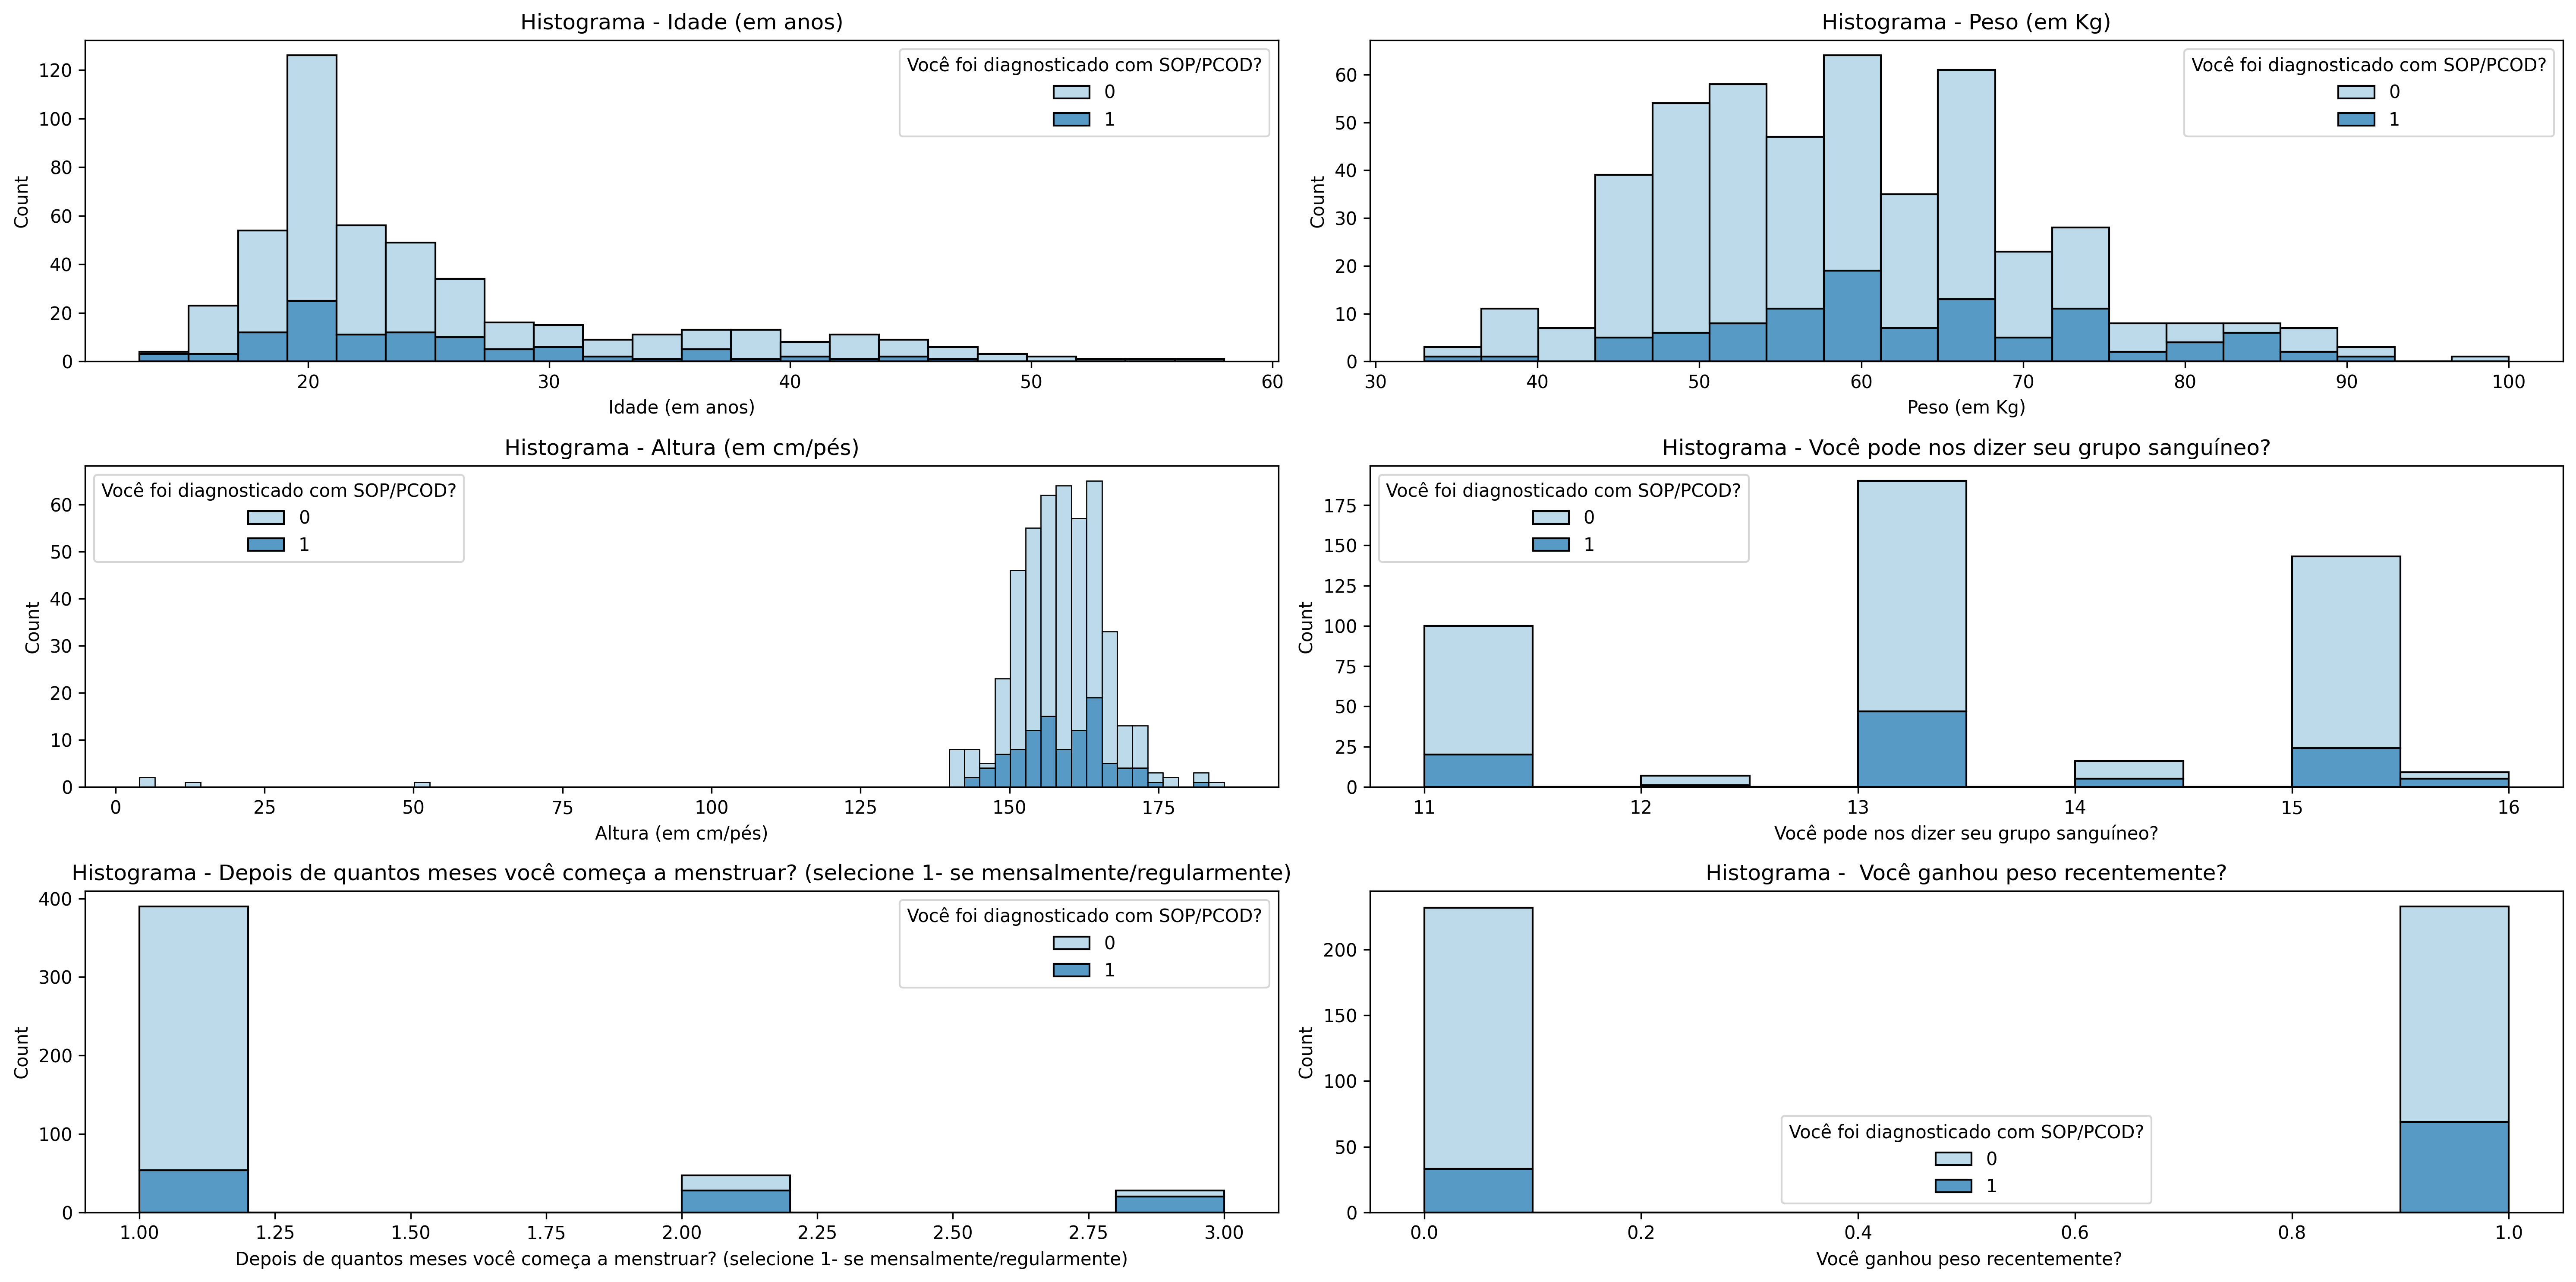

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10), dpi=300)

for ax, feature in zip(axes.flat, df.columns):
    sns.histplot(data=df,x=feature, hue='Você foi diagnosticado com SOP/PCOD?', ax=ax, multiple="stack", legend=True, palette=sns.color_palette("Paired")[0:7])
    ax.set_title(f'Histograma - {feature}')
plt.tight_layout()
plt.show()

## **5° Análise de Correlação**

> **Calcular os coeficientes de correlação entre características numéricas no conjunto de dados, visualizar as correlações usando um mapa de calor**

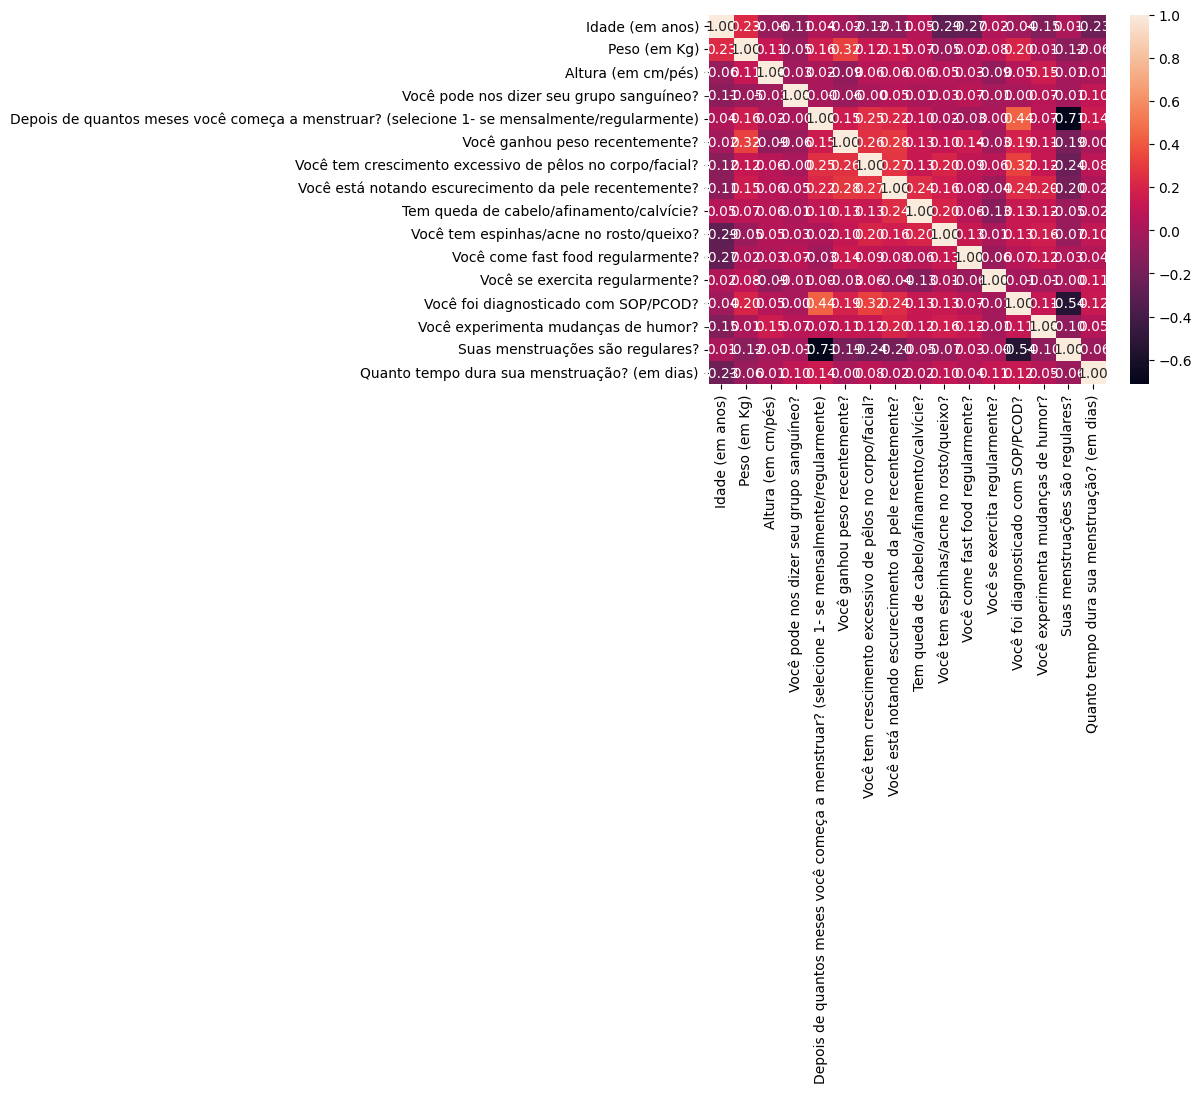

In [11]:
sns.heatmap(df.select_dtypes(include=['float', 'int']).corr(method='pearson'),annot=True, fmt=".2f");

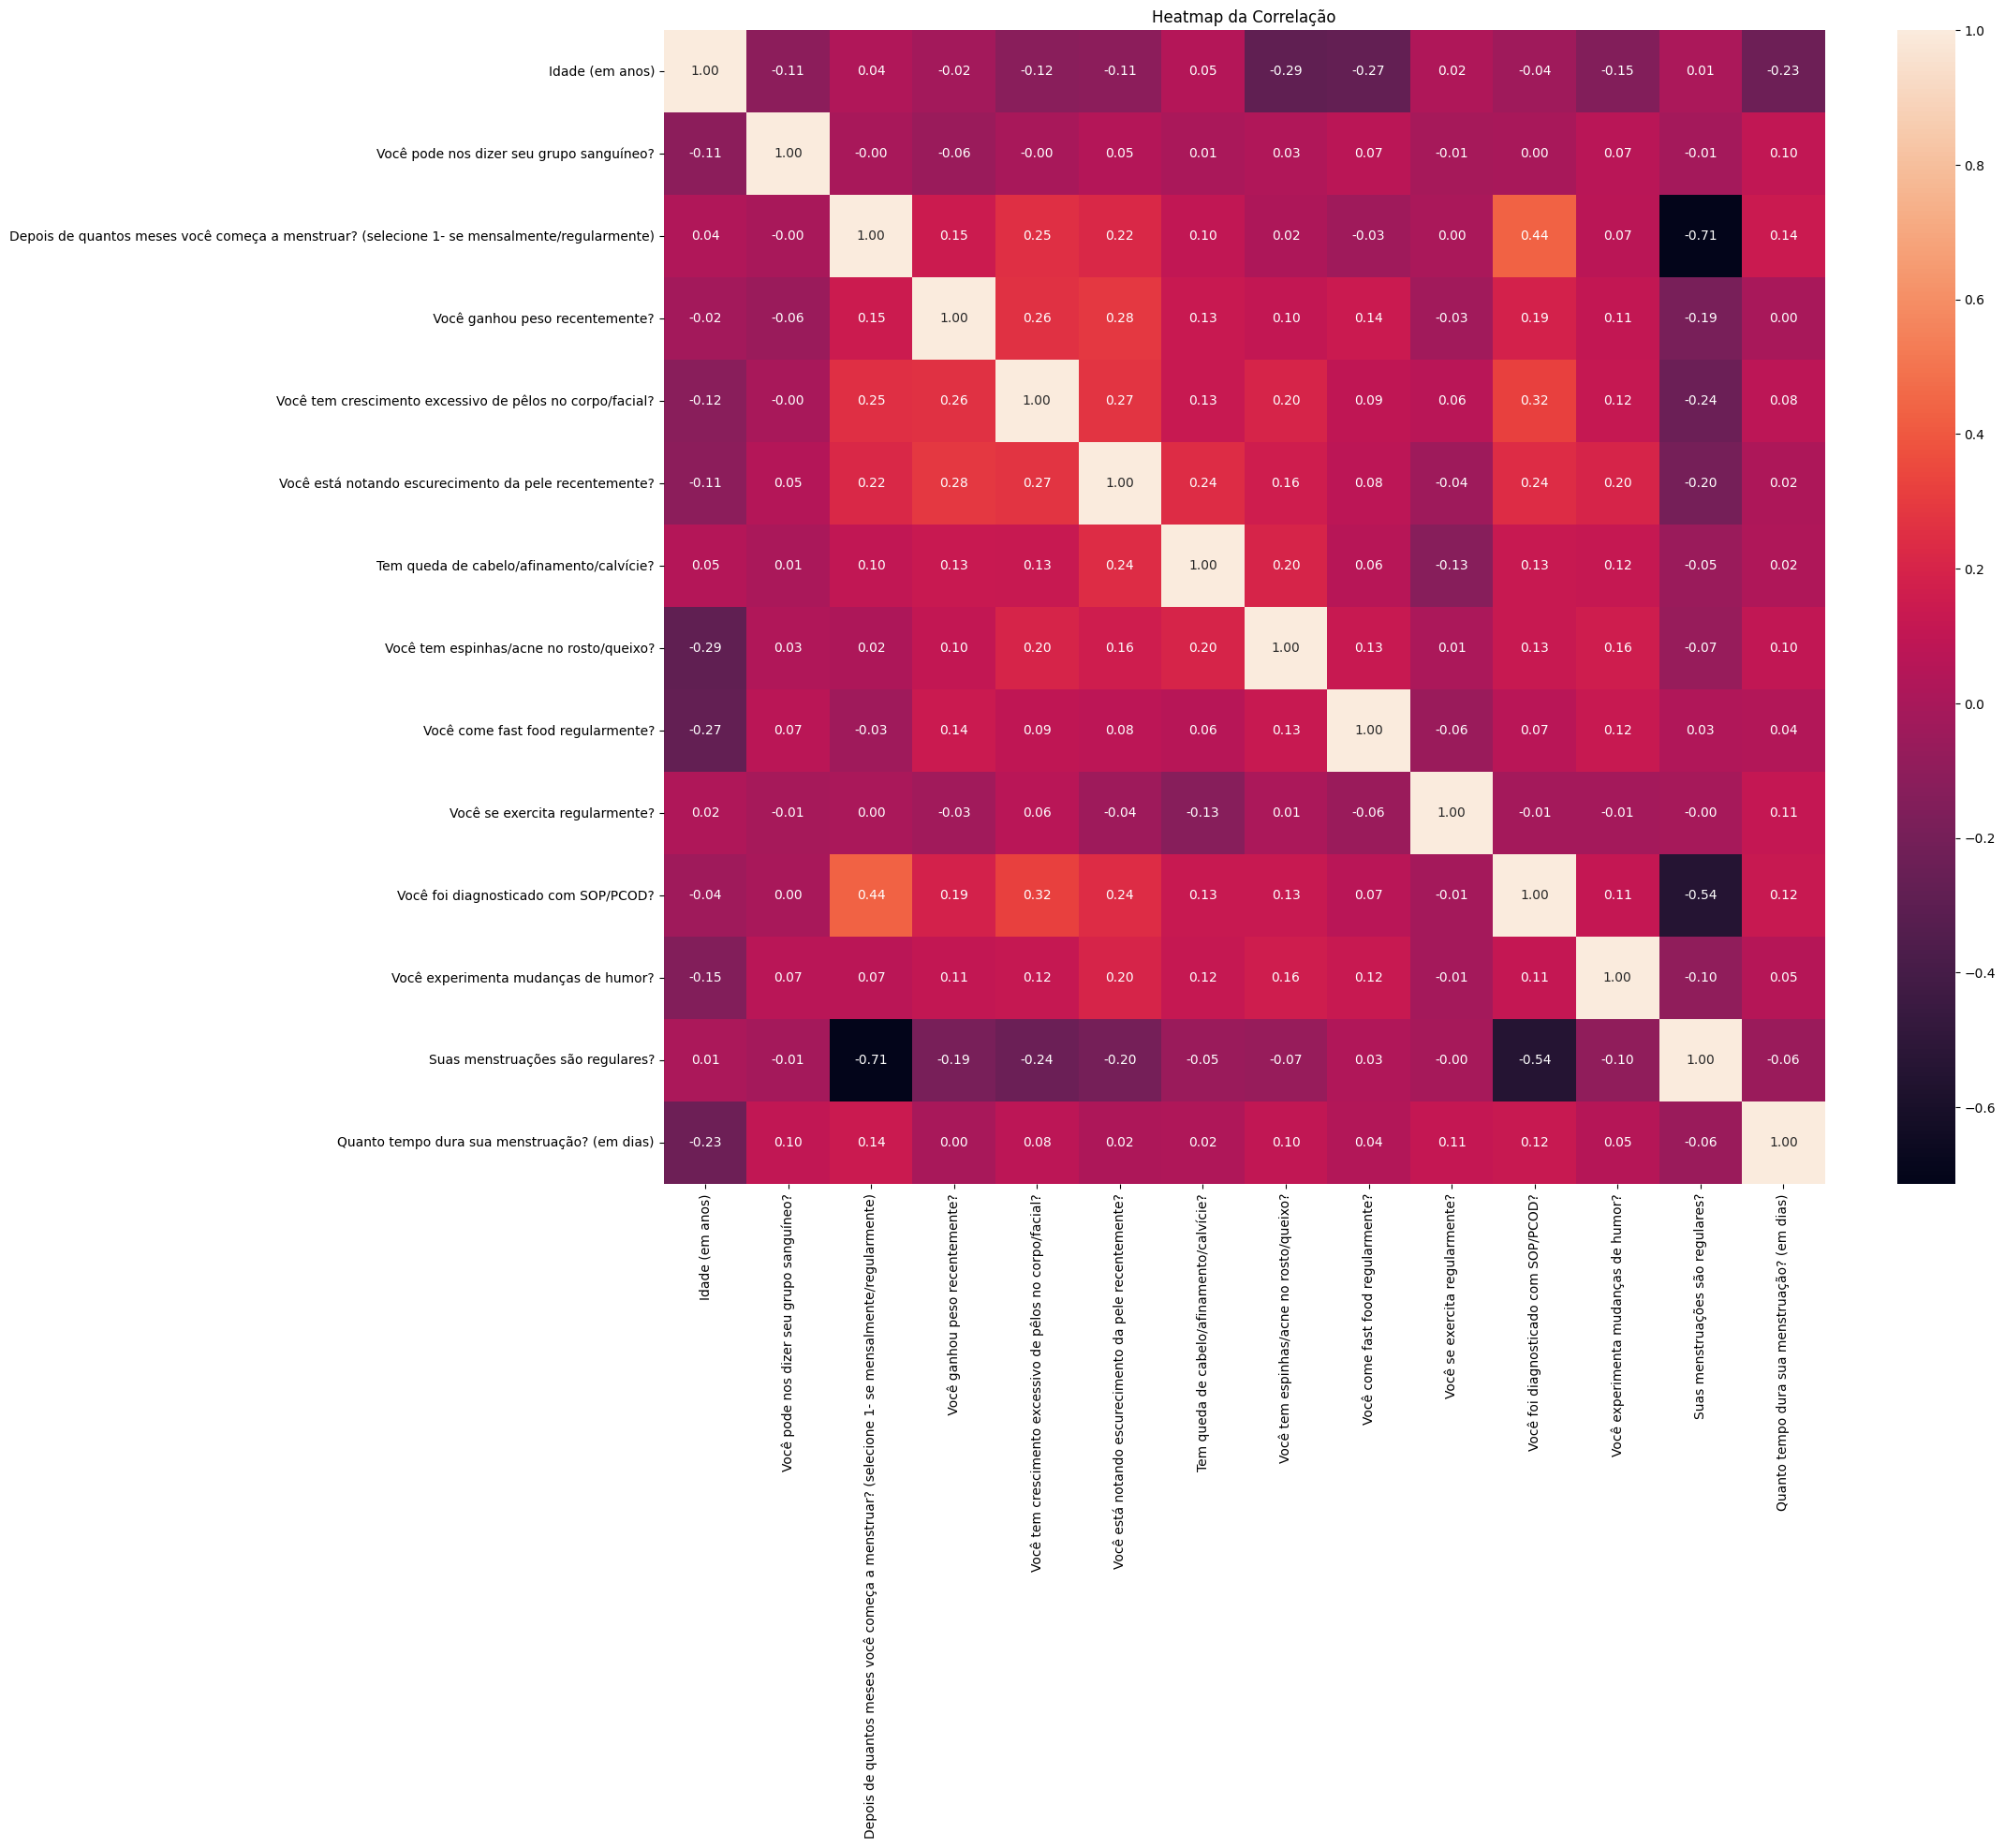

In [12]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.select_dtypes(include=['bool', 'int']).corr(method='pearson'),annot=True, fmt=".2f");
plt.title("Heatmap da Correlação")
plt.show()

## **6° Detecção de Outliers**

> **Detectar outliers em características numéricas do conjunto de dados usando técnicas como escore z ou método IQR, visualizar esses outliers**

In [13]:
df.describe()

,Idade (em anos),Peso (em Kg),Altura (em cm/pés),Você pode nos dizer seu grupo sanguíneo?,Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente),Você ganhou peso recentemente?,Você tem crescimento excessivo de pêlos no corpo/facial?,Você está notando escurecimento da pele recentemente?,Tem queda de cabelo/afinamento/calvície?,Você tem espinhas/acne no rosto/queixo?,Você come fast food regularmente?,Você se exercita regularmente?,Você foi diagnosticado com SOP/PCOD?,Você experimenta mudanças de humor?,Suas menstruações são regulares?,Quanto tempo dura sua menstruação? (em dias)
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,25.455914,59.286667,157.916473,13.262366,1.221505,0.501075,0.264516,0.337634,0.619355,0.412903,0.359140,0.286022,0.219355,0.761290,0.784946,4.600000
std,8.099775,11.137046,14.933218,1.499994,0.541758,0.500537,0.441550,0.473412,0.486068,0.492886,0.480265,0.452386,0.414255,0.426754,0.411302,1.536622
min,13.000000,33.000000,4.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,51.000000,154.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
50%,22.000000,58.000000,160.000000,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000
75%,28.000000,65.000000,164.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000
max,58.000000,100.000000,186.000000,16.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


**Cálculo do Intervalo Interquartílico (IQR) e Limites para Detecção de Outliers:**

In [14]:
df.columns = df.columns.str.strip()
df.rename(columns={'Você pode nos dizer seu grupo sanguíneo?': 'grupo_sanguineo'}, inplace=True)

q1 = df['grupo_sanguineo'].quantile(0.25)
q3 = df['grupo_sanguineo'].quantile(0.75)
iqr = q3 - q1

print("O IQR da variável é:", iqr)
sup = q3 + 1.5 * iqr
inf = q1 - 1.5 * iqr

print("O limite superior é:", sup)
print("O limite inferior é:", inf)


O IQR da variável é: 2.0
O limite superior é: 18.0
O limite inferior é: 10.0


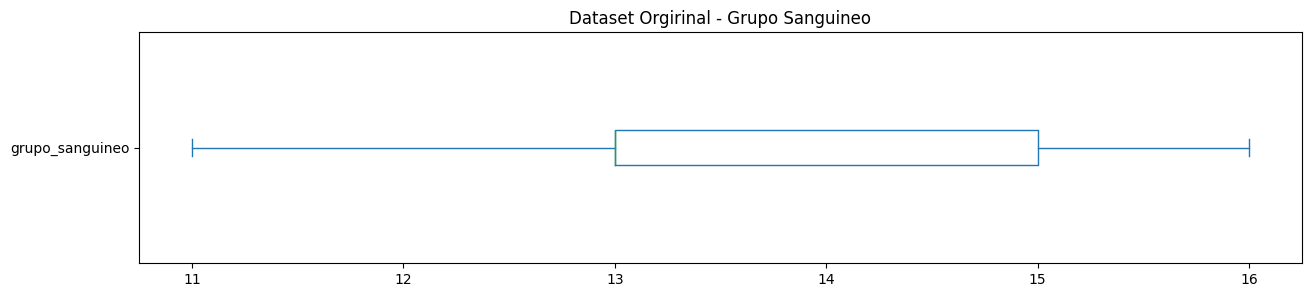

 O dataset possui 465 entradas
 0 Entradas acima de 798
 Representam 0.00% do dataset


In [15]:
fig, ax = plt.subplots(figsize=(15,3))
df.grupo_sanguineo.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Grupo Sanguineo')
plt.show()
print(" O dataset possui {} entradas".format(df.shape[0]))
print(" {} Entradas acima de 798".format(len(df[df.grupo_sanguineo > 798])))
print(" Representam {:.2f}% do dataset".format((len(df[df.grupo_sanguineo > 798]) / df.shape[0])*100))

**Remoção de Outliers**

A remoção dos Outliers só deve acontecer se realmente fizer sentido, e analisando as análises efetuadas foi decidido que:


- Não será removido os outilers da variável `Grupo Sanguineo` por causa do percentual 0%.


## **7° Técnicas Avançadas de Projeção de Dados (PCA, UMAP e t-SNE)**

In [16]:
df = df.replace({True: 1, False: 0}).copy()

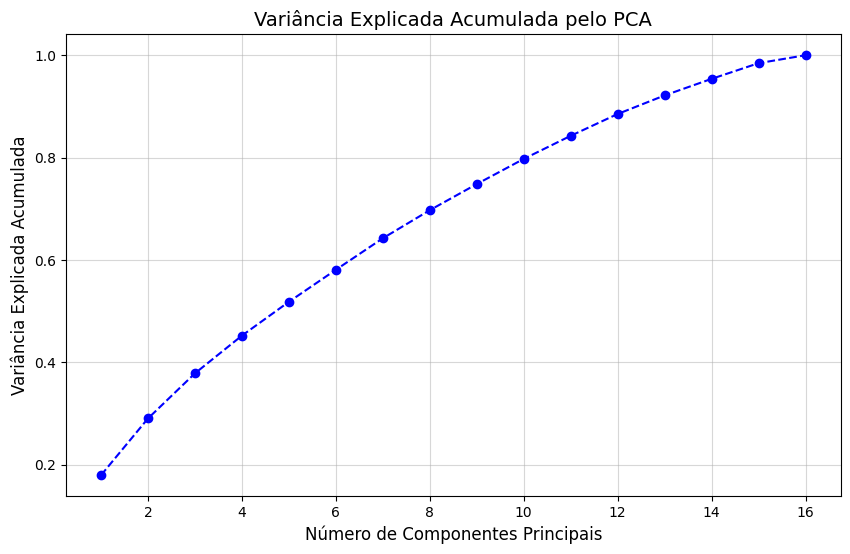

O número de componentes necessárias para preservar cerca de 95% da variância é: 14


In [17]:
X = df[['Idade (em anos)', 'Peso (em Kg)', 'Altura (em cm/pés)',
       'grupo_sanguineo',
       'Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente)',
       'Você ganhou peso recentemente?',
       'Você tem crescimento excessivo de pêlos no corpo/facial?',
       'Você está notando escurecimento da pele recentemente?',
       'Tem queda de cabelo/afinamento/calvície?',
       'Você tem espinhas/acne no rosto/queixo?',
       'Você come fast food regularmente?', 'Você se exercita regularmente?',
       'Você foi diagnosticado com SOP/PCOD?',
       'Você experimenta mudanças de humor?',
       'Suas menstruações são regulares?',
       'Quanto tempo dura sua menstruação? (em dias)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Variância Explicada Acumulada pelo PCA', fontsize=14)
plt.xlabel('Número de Componentes Principais', fontsize=12)
plt.ylabel('Variância Explicada Acumulada', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
print("O número de componentes necessárias para preservar cerca de 95% da variância é:", n_components_95)

> **A redução de dimensionalidade pelo PCA não eficiente para o estudo porque será reduzido para 14 colunas o dataframe e garantido cerca de 95%**

### **UMAP:**

In [18]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler

df = df.copy()
df = df.replace({True: 1, False: 0})

In [20]:
X = df[['Idade (em anos)', 'Peso (em Kg)', 'Altura (em cm/pés)',
       'grupo_sanguineo',
       'Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente)',
       'Você ganhou peso recentemente?',
       'Você tem crescimento excessivo de pêlos no corpo/facial?',
       'Você está notando escurecimento da pele recentemente?',
       'Tem queda de cabelo/afinamento/calvície?',
       'Você tem espinhas/acne no rosto/queixo?',
       'Você come fast food regularmente?', 'Você se exercita regularmente?',
       'Você foi diagnosticado com SOP/PCOD?',
       'Você experimenta mudanças de humor?',
       'Suas menstruações são regulares?',
       'Quanto tempo dura sua menstruação? (em dias)']]

# Converter os dados para inteiro, se necessário
X = X.astype(int)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular a variância explicada para diferentes números de componentes usando UMAP
umap_variances = {}
for n_components in range(1, 11):
    umap = UMAP(n_components=n_components, random_state=42)
    X_umap = umap.fit_transform(X_scaled)
    explained_variance = np.var(X_umap, axis=0).sum() / np.var(X_scaled, axis=0).sum()
    umap_variances[n_components] = explained_variance

# Exibir as variâncias explicadas para diferentes números de componentes
print(umap_variances)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

{1: 1.4698331356048584, 2: 0.5358585119247437, 3: 0.43108853697776794, 4: 0.3575054705142975, 5: 0.36674943566322327, 6: 0.36291438341140747, 7: 0.36542752385139465, 8: 0.3493143916130066, 9: 0.3652336299419403, 10: 0.3860182762145996}


### **t-SNE:**

<ipython-input-21-e1b96bea13e2>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], cmap='viridis')


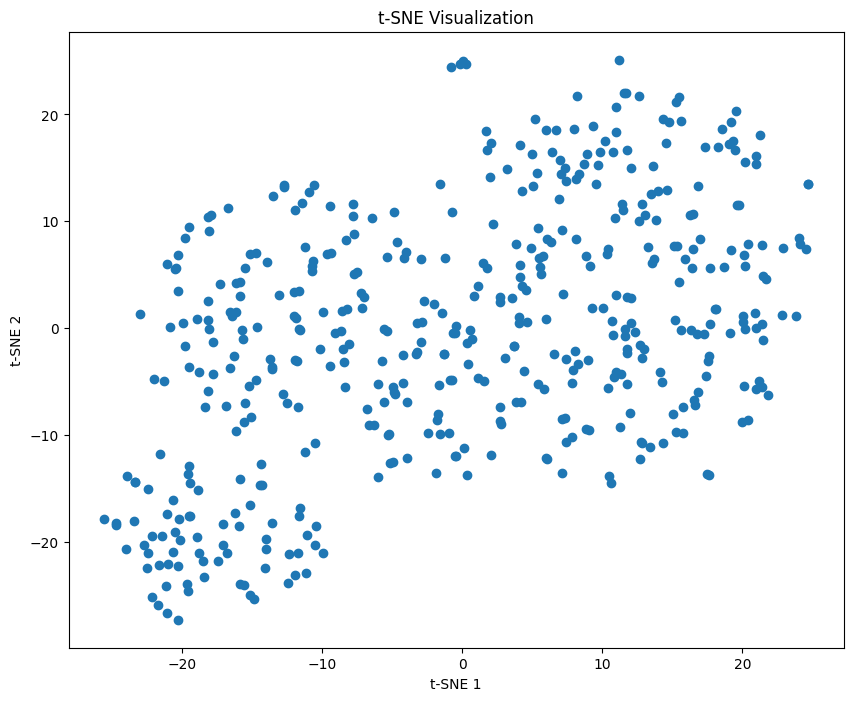

In [21]:
from sklearn.manifold import TSNE

X = df[['Idade (em anos)', 'Peso (em Kg)', 'Altura (em cm/pés)',
       'grupo_sanguineo',
       'Depois de quantos meses você começa a menstruar? (selecione 1- se mensalmente/regularmente)',
       'Você ganhou peso recentemente?',
       'Você tem crescimento excessivo de pêlos no corpo/facial?',
       'Você está notando escurecimento da pele recentemente?',
       'Tem queda de cabelo/afinamento/calvície?',
       'Você tem espinhas/acne no rosto/queixo?',
       'Você come fast food regularmente?', 'Você se exercita regularmente?',
       'Você foi diagnosticado com SOP/PCOD?',
       'Você experimenta mudanças de humor?',
       'Suas menstruações são regulares?',
       'Quanto tempo dura sua menstruação? (em dias)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()